In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
D = "\033[0m"
R = "\033[31m"
G = "\033[32m"
BC = "\033[96m"
B_BB = "\033[100m"

In [ ]:
import os


# train_sadness_dir = os.path.join('./sadness-or-happiness/sadness')

# train_happiness_dir = os.path.join('./sadness or happiness/happiness')

train_sadness_dir = os.path.join('/content/drive/MyDrive/sadness or happiness/happiness')

train_happiness_dir = os.path.join('/content/drive/MyDrive/sadness or happiness/sadness')

In [ ]:
train_sadness_names = os.listdir(train_sadness_dir)
print(train_sadness_names[:10])

train_happiness_names = os.listdir(train_happiness_dir)
print(train_happiness_names[:10])

['8fe3d57aa33ba7950e9ec2e8d7a116dc0421bf59f7d9c5f1429e3494116b4b0c064d41693b86fd2dc42adcace039972f6c074a4a3da92c50a817289ac0b44caee976ece775893e940d0ed4bd1b9afc95.jpeg', 'unnamed.jpeg', '99f.jpeg', 'thumb_pepe-the-frog-poo-poo-pee-pee-52962497.png', 'images.jpeg', 'images.png', 'download.jpeg', 'png-transparent-pepe-the-frog-pepe-the-frog-telegram-sticker-decal-others-vertebrate-meme-fictional-character.png', 'images (1).png', 'flat,750x,075,f-pad,750x1000,f8f8f8.u5.jpg']
['dcac377b449edd131d6a622ba068e29295fc0600192b61a4402cf2dd96b4dd4a9ee3eb5ee4ac8fc6a55c5b3b53f25ae3b4a2245fa9bfbcb8f6cddf9bf6129d759b4ee888d2fe18dd84cd5d0028d4c1ee8f6bc4b7863940c7c762ac5b0767a479.jpeg', 'c0a95f8478fbc463f887d85b99a3dd9ba7f7adfe438c945fde552ca60111dbfb23ea93d9bcfbbb46888fcc1b42b2451e4467c0fe2cfd42cfbe9af2efb4e592a990550bb21943eb486d2792179b68ebf8.png', '1023.jpeg', 'images.jpeg', 'a.jpeg', '20210111112529_lpasqavh.jpeg', 'images (1).jpeg', 'Screen_Shot_2017_06_27_at_1.05.21_PM.0.jpeg', 'Pepe.webp', 'ima

In [ ]:
print(len(train_sadness_names))
print(len(train_happiness_names))

20
22


In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/sadness or happiness',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


Found 41 images belonging to 2 classes.


# Callback 추가

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    # Check accuracy
    if(float(logs.get('accuracy')) > 0.9):
      print(f"\n\n{G}정확도가 0.9보다 크기 때문에 학습을 종료합니다.{D}")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [ ]:
history = model.fit(
      train_generator,
      # steps_per_epoch=8,  
      epochs=30,
      callbacks=[callbacks],
      verbose=1)

Epoch 1/30
1/1 [==============================] - 5s 5s/step - loss: 0.6957 - accuracy: 0.4878
Epoch 2/30
1/1 [==============================] - 4s 4s/step - loss: 1.2372 - accuracy: 0.5122
Epoch 3/30
1/1 [==============================] - 4s 4s/step - loss: 0.7341 - accuracy: 0.4878
Epoch 4/30
1/1 [==============================] - 3s 3s/step - loss: 0.6884 - accuracy: 0.6585
Epoch 5/30
1/1 [==============================] - 4s 4s/step - loss: 0.6730 - accuracy: 0.8537
Epoch 6/30
1/1 [==============================] - 4s 4s/step - loss: 0.6432 - accuracy: 0.5854
Epoch 7/30
1/1 [==============================] - 4s 4s/step - loss: 0.8447 - accuracy: 0.4878
Epoch 8/30
1/1 [==============================] - 4s 4s/step - loss: 0.6684 - accuracy: 0.6098
Epoch 9/30
1/1 [==============================] - 4s 4s/step - loss: 0.6172 - accuracy: 0.7805
Epoch 10/30
1/1 [==============================] - 3s 3s/step - loss: 0.5064 - accuracy: 0.8537
Epoch 11/30
1/1 [==============================] 

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Saving 슬픈 뚱이.jpg to 슬픈 뚱이.jpg


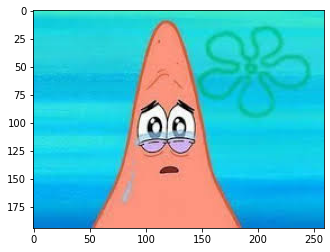

슬픈 뚱이.jpg 는 57.69% 확률로 슬픔


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  # print(classes[0])

  img = mpimg.imread(path)
  plt.imshow(img)
  plt.show()
    
  if classes[0]>0.5:
    print(f"{B_BB}{fn}{D} 는 {BC}{100*(classes[0][0]):.2f}%{D} 확률로 {R}슬픔{D}")
  else:
    print(f"{B_BB}{fn}{D} 는 {BC}{100*(1 - classes[0][0]):.2f}%{D} 확률로 {G}행복{D}")